# Tests for Portfolio VaR Functions

In [ ]:
import pandas as pd
import portfolio as pv
import plots as pl
import data_download as dd

### Asset Normal/ Undiversified VaR

**NOTE**: since we already have the parametric VaR, a Portfolio-Normal VaR function is redundant. Portfolio-Normal is exactly like parametric VaR (which we have), and that can be backtested and ES can be done (add note about that).

In [4]:
# Define shares directly (tickers inferred from index)
shares = pd.Series({
    "AAPL": 10,
    "MSFT": 9,
    "NVDA": 80,
    "GOOGL": 6,
    "JPM": -9
})

# Download prices for the tickers in 'shares'
tickers = shares.index.tolist()
prices = dd.get_raw_prices(tickers, start="2024-01-01")

# Convert prices to base currency (e.g. CHF)
prices_converted = dd.convert_to_base(prices, base_currency="CHF")

# Create portfolio with monetary positions
position_data = dd.create_portfolio(prices_converted, shares)

# Compute returns and summary stats
returns, mean_returns, covariance_matrix = dd.summary_statistics(position_data)

# Display
final_value = position_data.sum(axis=1).iloc[-1]
print(f"\nPortfolio final value in CHF: {final_value:.2f}")
print("\nSample of daily returns:\n", returns.head())
print("\nMean returns (daily, in CHF):\n", mean_returns)
print("\nCovariance matrix (in CHF):\n", covariance_matrix)


[currency detection] AAPL: USD
[currency detection] GOOGL: USD
[currency detection] JPM: USD
[currency detection] MSFT: USD
[currency detection] NVDA: USD
[fx download] Downloading FX pairs: CHFUSD=X
[conversion] AAPL: USD → CHF via CHFUSD=X
[conversion] GOOGL: USD → CHF via CHFUSD=X
[conversion] JPM: USD → CHF via CHFUSD=X
[conversion] MSFT: USD → CHF via CHFUSD=X
[conversion] NVDA: USD → CHF via CHFUSD=X

Portfolio final value in CHF: 13098.64

Sample of daily returns:
                 AAPL     GOOGL       JPM      MSFT      NVDA
Date                                                        
2024-01-03  0.002215  0.015257  0.005375  0.009041 -0.002782
2024-01-04 -0.014117 -0.019621  0.005191 -0.008602  0.007570
2024-01-05 -0.002722 -0.003550  0.006319  0.000779  0.024222
2024-01-08  0.025054  0.023792 -0.000594  0.019747  0.065195
2024-01-09 -0.005582  0.011820 -0.011206 -0.000401  0.013592

Mean returns (daily, in CHF):
 AAPL     0.000532
GOOGL    0.000740
JPM      0.001478
MSFT     0

In [5]:
# Set parameters
confidence_level = 0.99
holding_period = 1

In [6]:
position_data.head()

,AAPL,GOOGL,JPM,MSFT,NVDA
Date,,,,,
2024-01-02,1551.522630,694.622688,-1259.144004,2778.545632,3242.954747
2024-01-03,1554.959016,705.220497,-1265.911624,2803.665191,3233.934430
2024-01-04,1533.007607,691.383402,-1272.483602,2779.547063,3258.416930
2024-01-05,1528.834350,688.929295,-1280.525050,2781.711338,3337.342789
2024-01-08,1567.138256,705.320088,-1279.764925,2836.641003,3554.920289


In [7]:
# Compute and display the summary
summary_df = pv.asset_normal_var(position_data=position_data,
                                 confidence_level=confidence_level,
                                 holding_period=holding_period)

In [8]:
summary_df.head(-10)

,Diversified_VaR,Undiversified_VaR,Diversification_Benefit
Date,,,
2024-01-03,386.581932,432.383741,45.801809
2024-01-04,386.733263,431.638010,44.904747
2024-01-05,392.780008,437.779536,44.999528
2024-01-08,413.208477,460.827709,47.619232
2024-01-09,417.197916,465.449782,48.251867
...,...,...,...
2025-04-29,710.457974,759.557125,49.099151
2025-04-30,712.150471,761.565316,49.414845
2025-05-01,735.142968,787.534886,52.391918


### Marginal VaR

In [9]:
# Compute and display Marginal VaR (styled table)
marginal_df = pv.marginal_var(
    position_data=position_data,
    confidence_level=confidence_level,
    holding_period=holding_period,
)


In [10]:
marginal_df.head()

,AAPL,GOOGL,JPM,MSFT,NVDA
Date,,,,,
2024-01-03,0.027876,0.029278,0.011423,0.028975,0.079103
2024-01-04,0.027727,0.029156,0.011350,0.028883,0.079250
2024-01-05,0.027562,0.029032,0.011330,0.028774,0.079437
2024-01-08,0.027358,0.028879,0.011459,0.028611,0.079741
2024-01-09,0.027270,0.028852,0.011515,0.028562,0.079843


### Incremental, Component and Relative Component VaR

In [11]:
# Compute and display Component VaR (styled table)
component_df = pv.component_var(
    position_data=position_data,
    confidence_level=confidence_level,
    holding_period=holding_period,
)

In [12]:
component_df.head()

,AAPL,GOOGL,JPM,MSFT,NVDA
Date,,,,,
2024-01-03,43.345715,20.647421,-14.460464,81.236615,255.812645
2024-01-04,42.505634,20.157870,-14.442667,80.282401,258.230024
2024-01-05,42.138342,20.001339,-14.507789,80.040578,265.107538
2024-01-08,42.874536,20.368816,-14.664749,81.158137,283.471736
2024-01-09,42.496714,20.590353,-14.570954,80.987265,287.694538


In [13]:
rcvar_df = pv.relative_component_var(
    position_data=position_data,
    confidence_level=confidence_level,
    holding_period=holding_period,
)


In [14]:
rcvar_df.head()

,AAPL,GOOGL,JPM,MSFT,NVDA
Date,,,,,
2024-01-03,0.112126,0.053410,-0.037406,0.210141,0.661729
2024-01-04,0.109909,0.052123,-0.037345,0.207591,0.667721
2024-01-05,0.107282,0.050922,-0.036936,0.203780,0.674952
2024-01-08,0.103760,0.049294,-0.035490,0.196410,0.686026
2024-01-09,0.101862,0.049354,-0.034926,0.194122,0.689588


In [15]:
# Define change in position
change_vector = [0,10000,0,0,0]  

# Compute and display Incremental VaR
ivar_series = pv.incremental_var(
    position_data=position_data,
    change_vector=change_vector,
    confidence_level=confidence_level,
    holding_period=holding_period,
)

In [16]:
ivar_series.head()

Date
2024-01-03    292.779654
2024-01-04    291.558492
2024-01-05    290.324986
2024-01-08    288.788264
2024-01-09    288.518849
dtype: float64

## ES Test

In [17]:
# Compute and display Marginal VaR (styled table)
marginal_es_df = pv.marginal_es(
    position_data=position_data,
    confidence_level=confidence_level,
    holding_period=holding_period,
)


In [18]:
marginal_es_df.head()

,AAPL,GOOGL,JPM,MSFT,NVDA
Date,,,,,
2024-01-03,0.031936,0.033543,0.013087,0.033196,0.090625
2024-01-04,0.031766,0.033403,0.013003,0.033091,0.090794
2024-01-05,0.031577,0.033262,0.012980,0.032965,0.091008
2024-01-08,0.031344,0.033085,0.013128,0.032778,0.091356
2024-01-09,0.031242,0.033055,0.013192,0.032722,0.091474


In [19]:
# Compute and display Component VaR (styled table)
component_es_df = pv.component_es(
    position_data=position_data,
    confidence_level=confidence_level,
    holding_period=holding_period,
)

In [20]:
component_es_df.head()

,AAPL,GOOGL,JPM,MSFT,NVDA
Date,,,,,
2024-01-03,49.659648,23.655018,-16.566841,93.069908,293.075471
2024-01-04,48.697197,23.094157,-16.546451,91.976699,295.844976
2024-01-05,48.276403,22.914824,-16.621059,91.699650,303.724301
2024-01-08,49.119835,23.335830,-16.800882,92.979998,324.763510
2024-01-09,48.686977,23.589637,-16.693426,92.784236,329.601424


In [21]:
res_df = pv.relative_component_es(
    position_data=position_data,
    confidence_level=confidence_level,
    holding_period=holding_period,
)


In [22]:
res_df.head()

,AAPL,GOOGL,JPM,MSFT,NVDA
Date,,,,,
2024-01-03,0.112126,0.053410,-0.037406,0.210141,0.661729
2024-01-04,0.109909,0.052123,-0.037345,0.207591,0.667721
2024-01-05,0.107282,0.050922,-0.036936,0.203780,0.674952
2024-01-08,0.103760,0.049294,-0.035490,0.196410,0.686026
2024-01-09,0.101862,0.049354,-0.034926,0.194122,0.689588


In [23]:
# Define change in position
change_vector = [0,10000,0,0,0]  

# Compute and display Incremental VaR
ies_series = pv.incremental_es(
    position_data=position_data,
    change_vector=change_vector,
    confidence_level=confidence_level,
    holding_period=holding_period,
)

In [24]:
ies_series.head()

Date
2024-01-03    335.427262
2024-01-04    334.028220
2024-01-05    332.615035
2024-01-08    330.854468
2024-01-09    330.545808
dtype: float64

### Visualizations


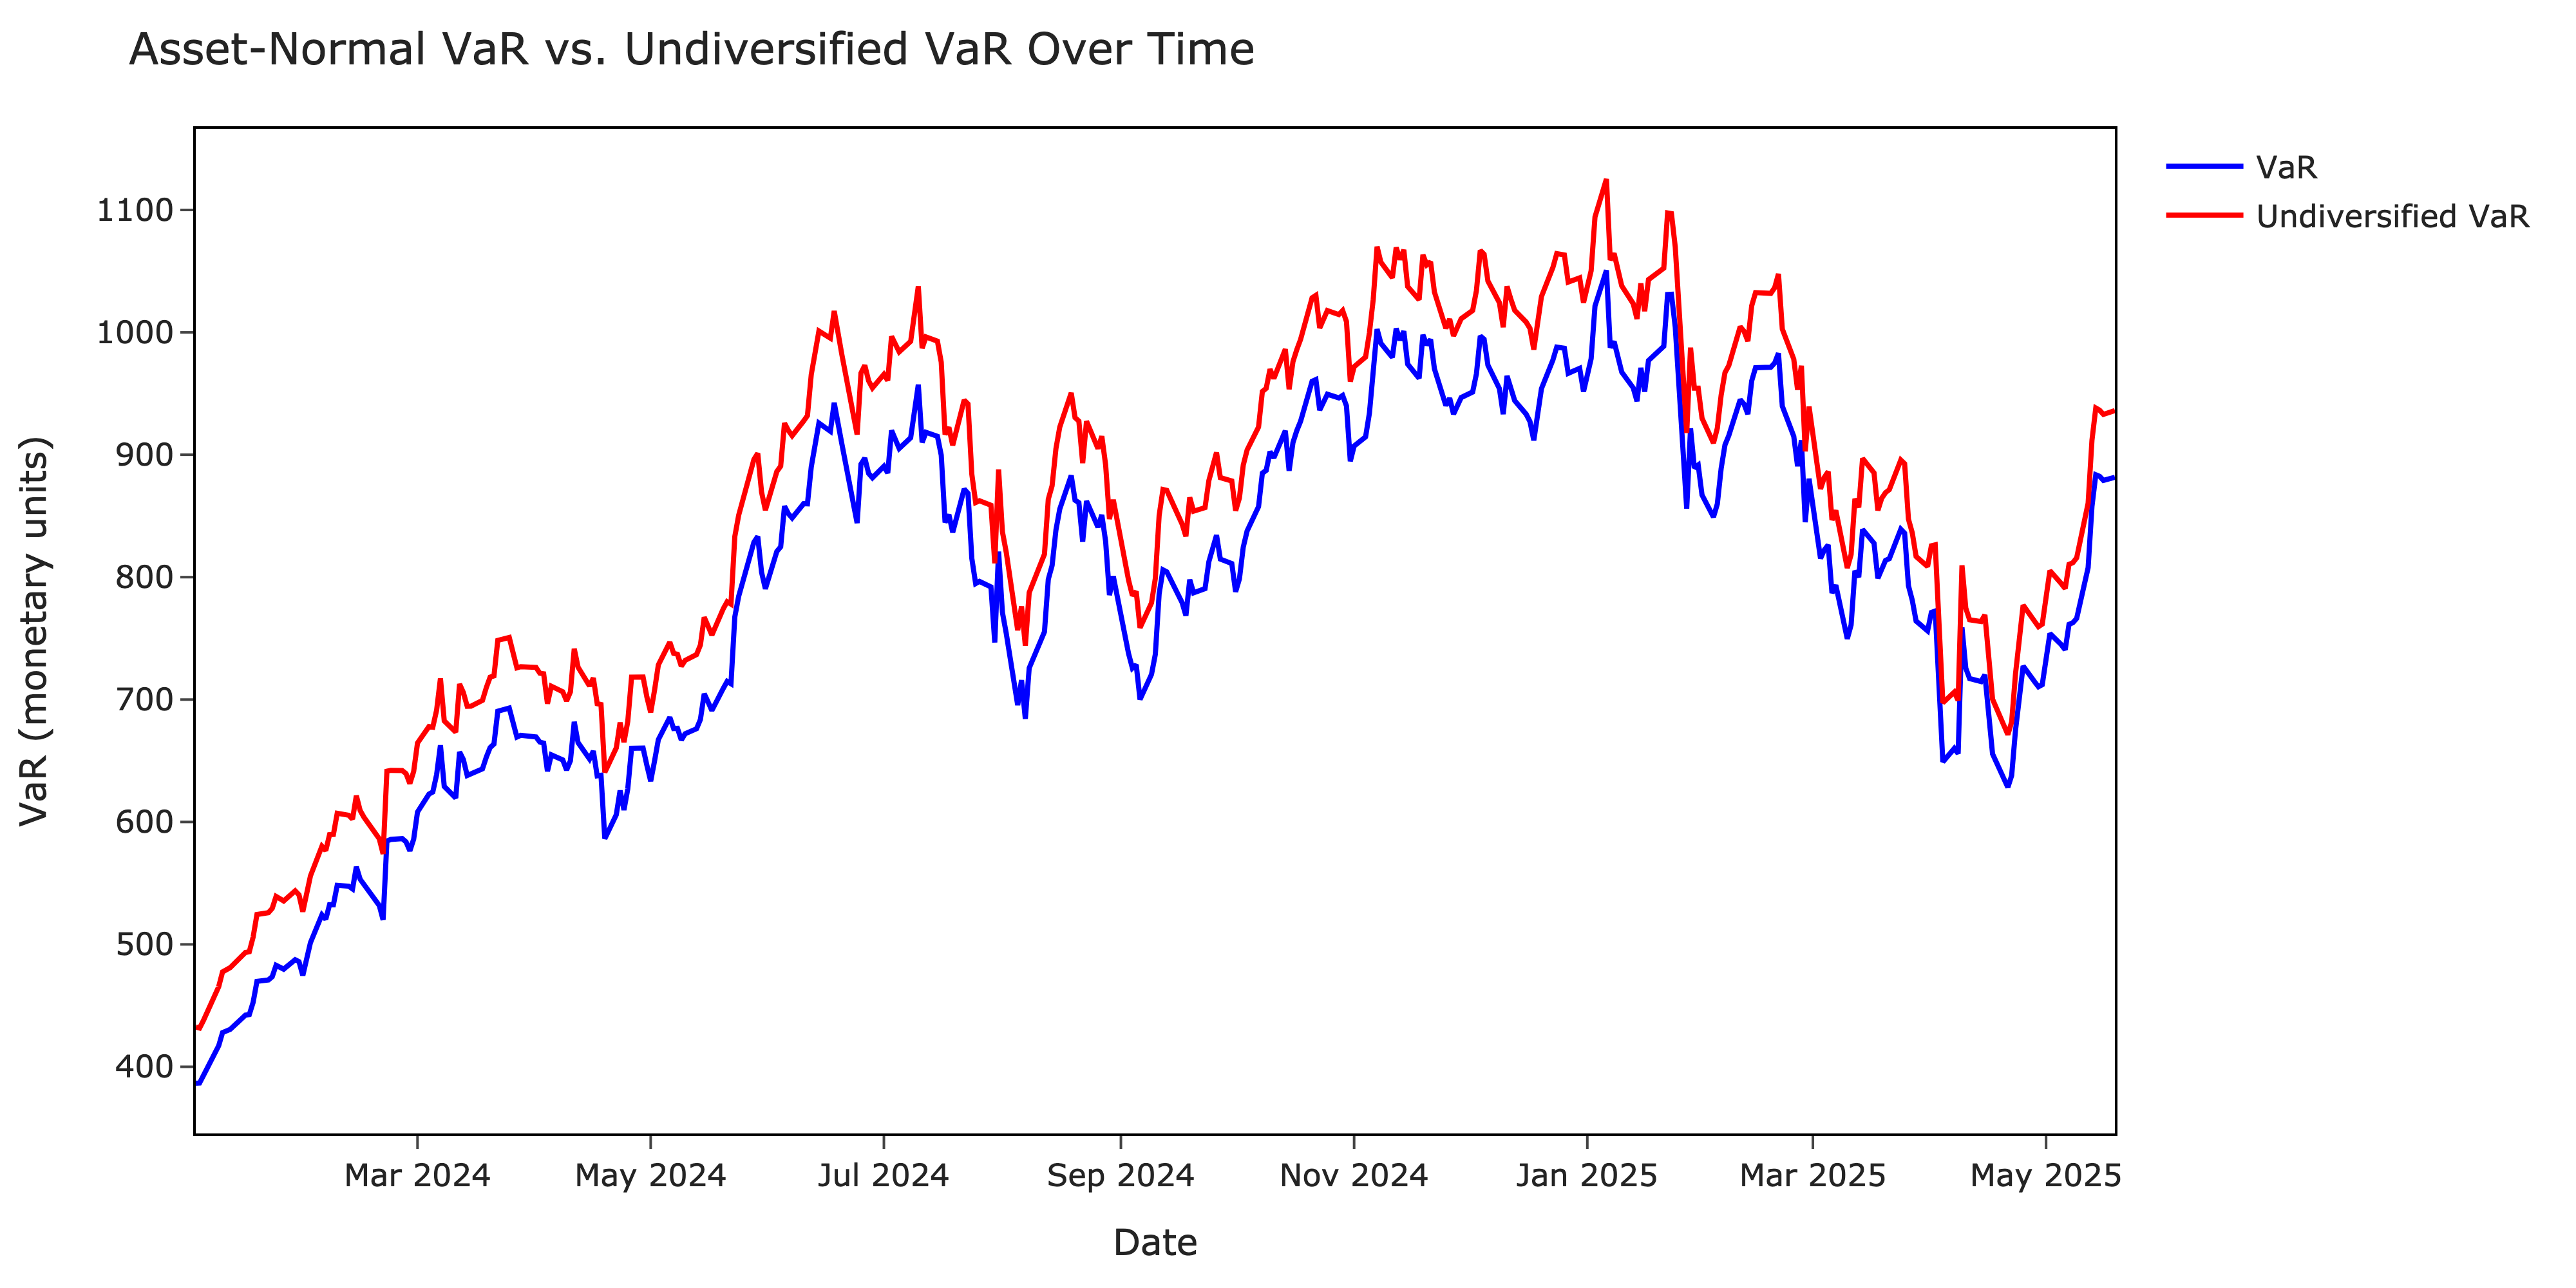

In [25]:
pl.plot_var_series(summary_df, interactive=False)


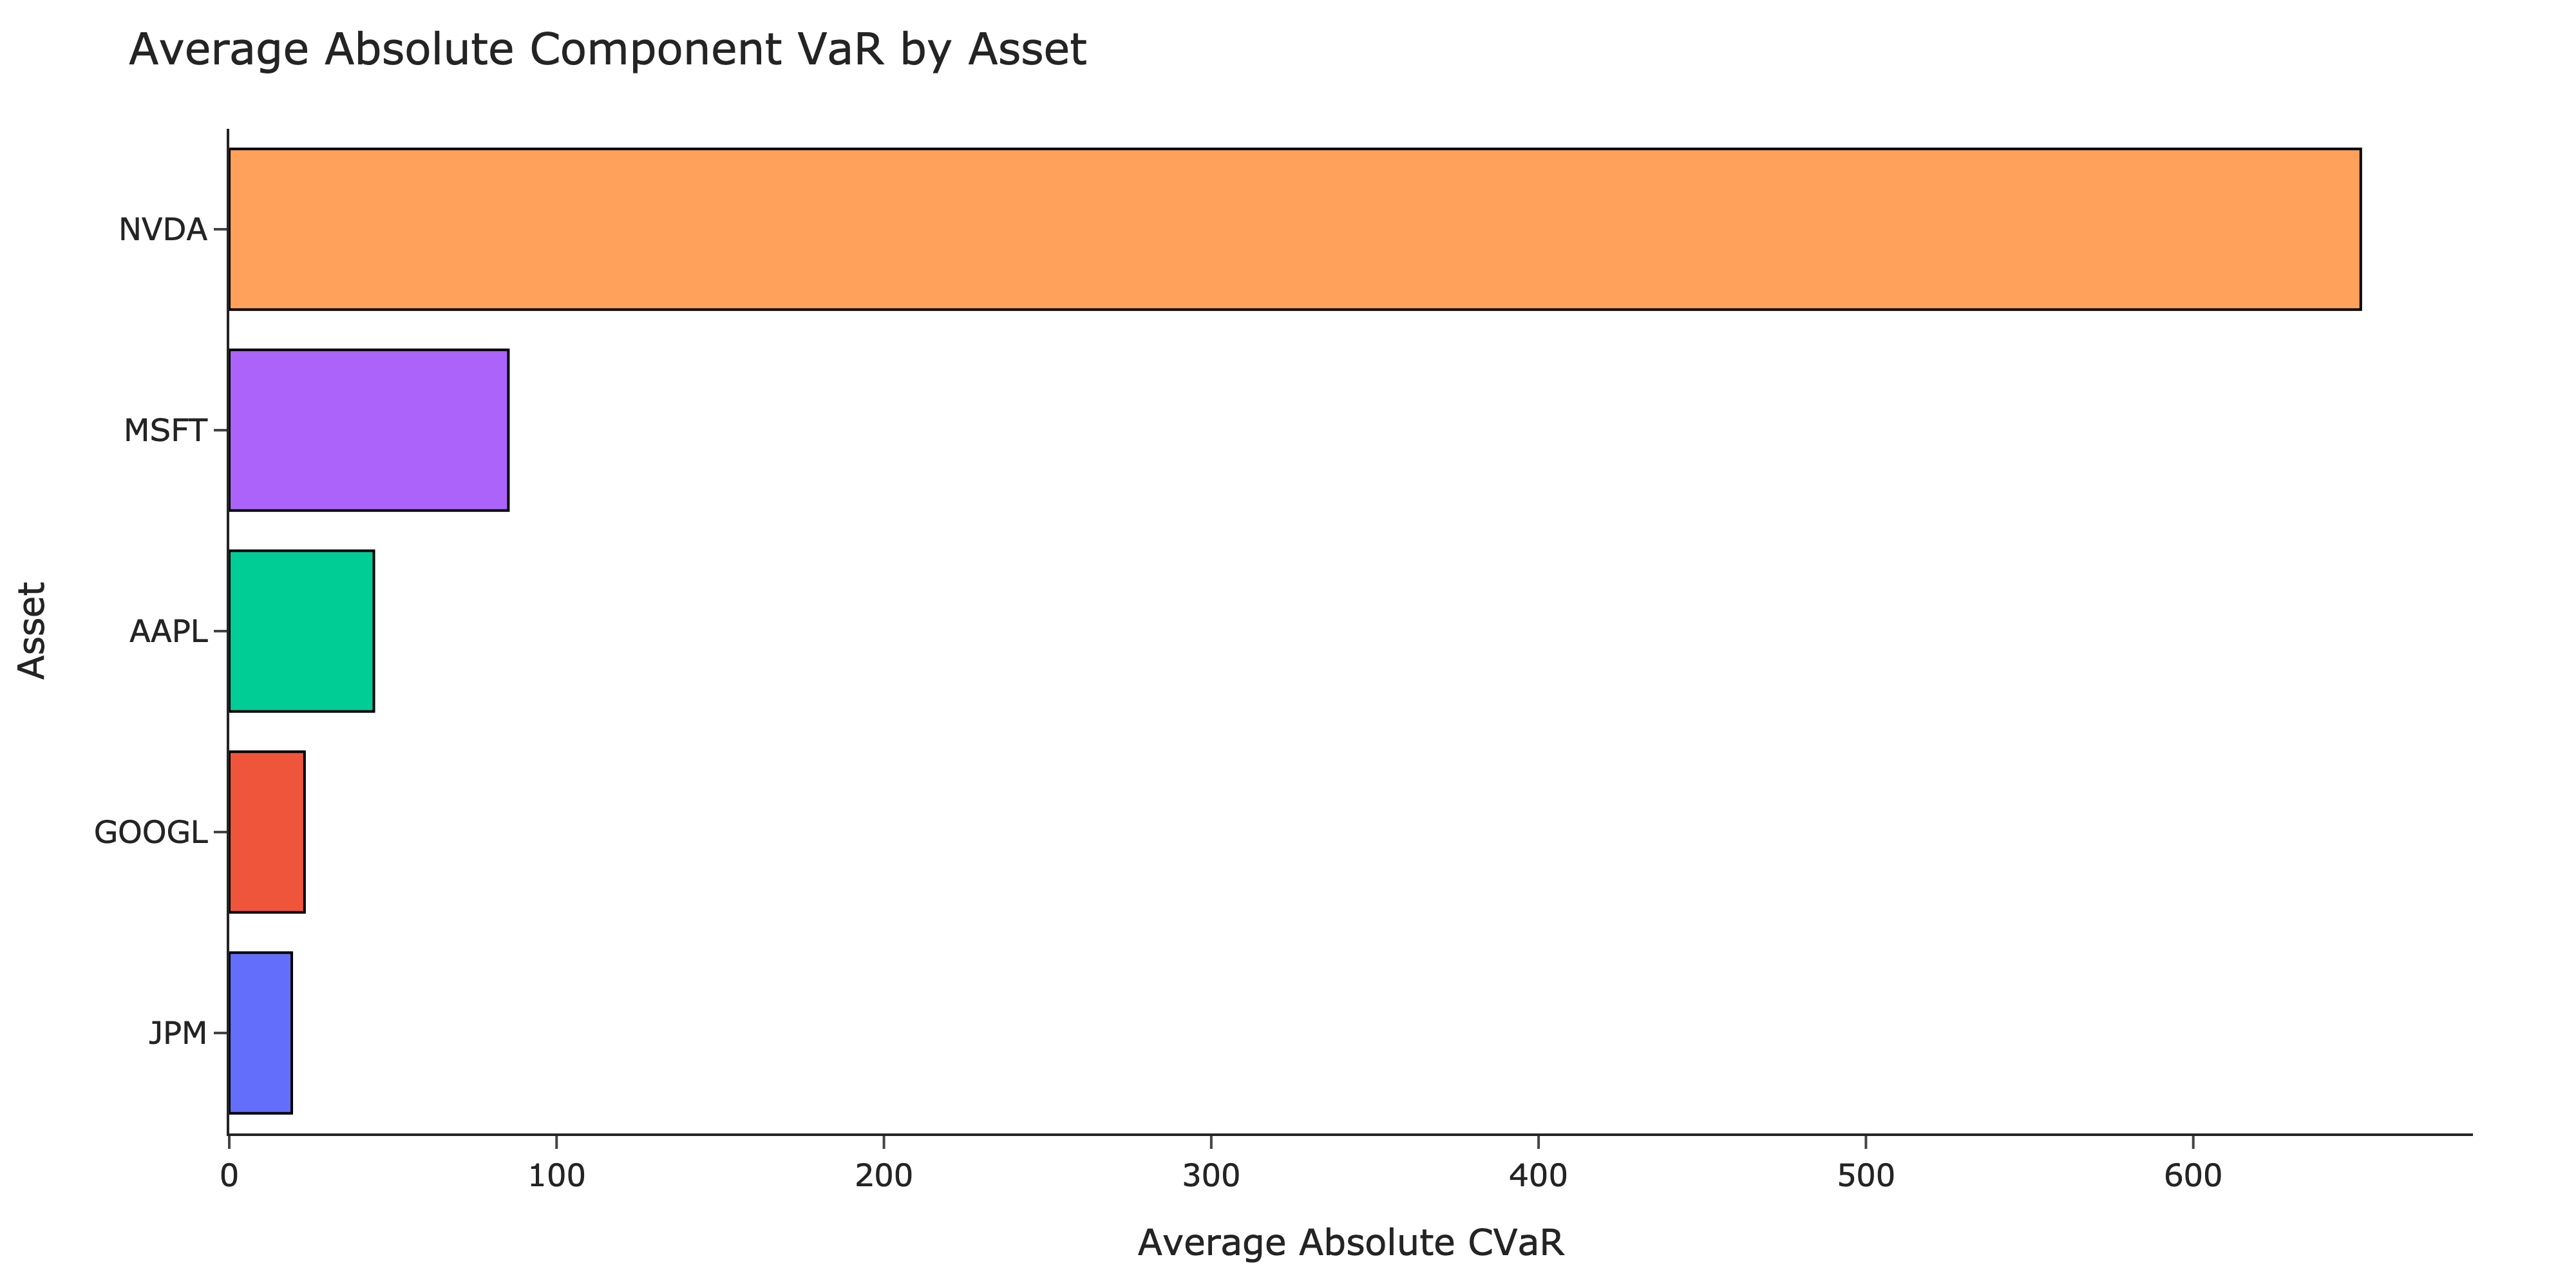

In [26]:
pl.plot_risk_contribution_bar(component_df, interactive=False)


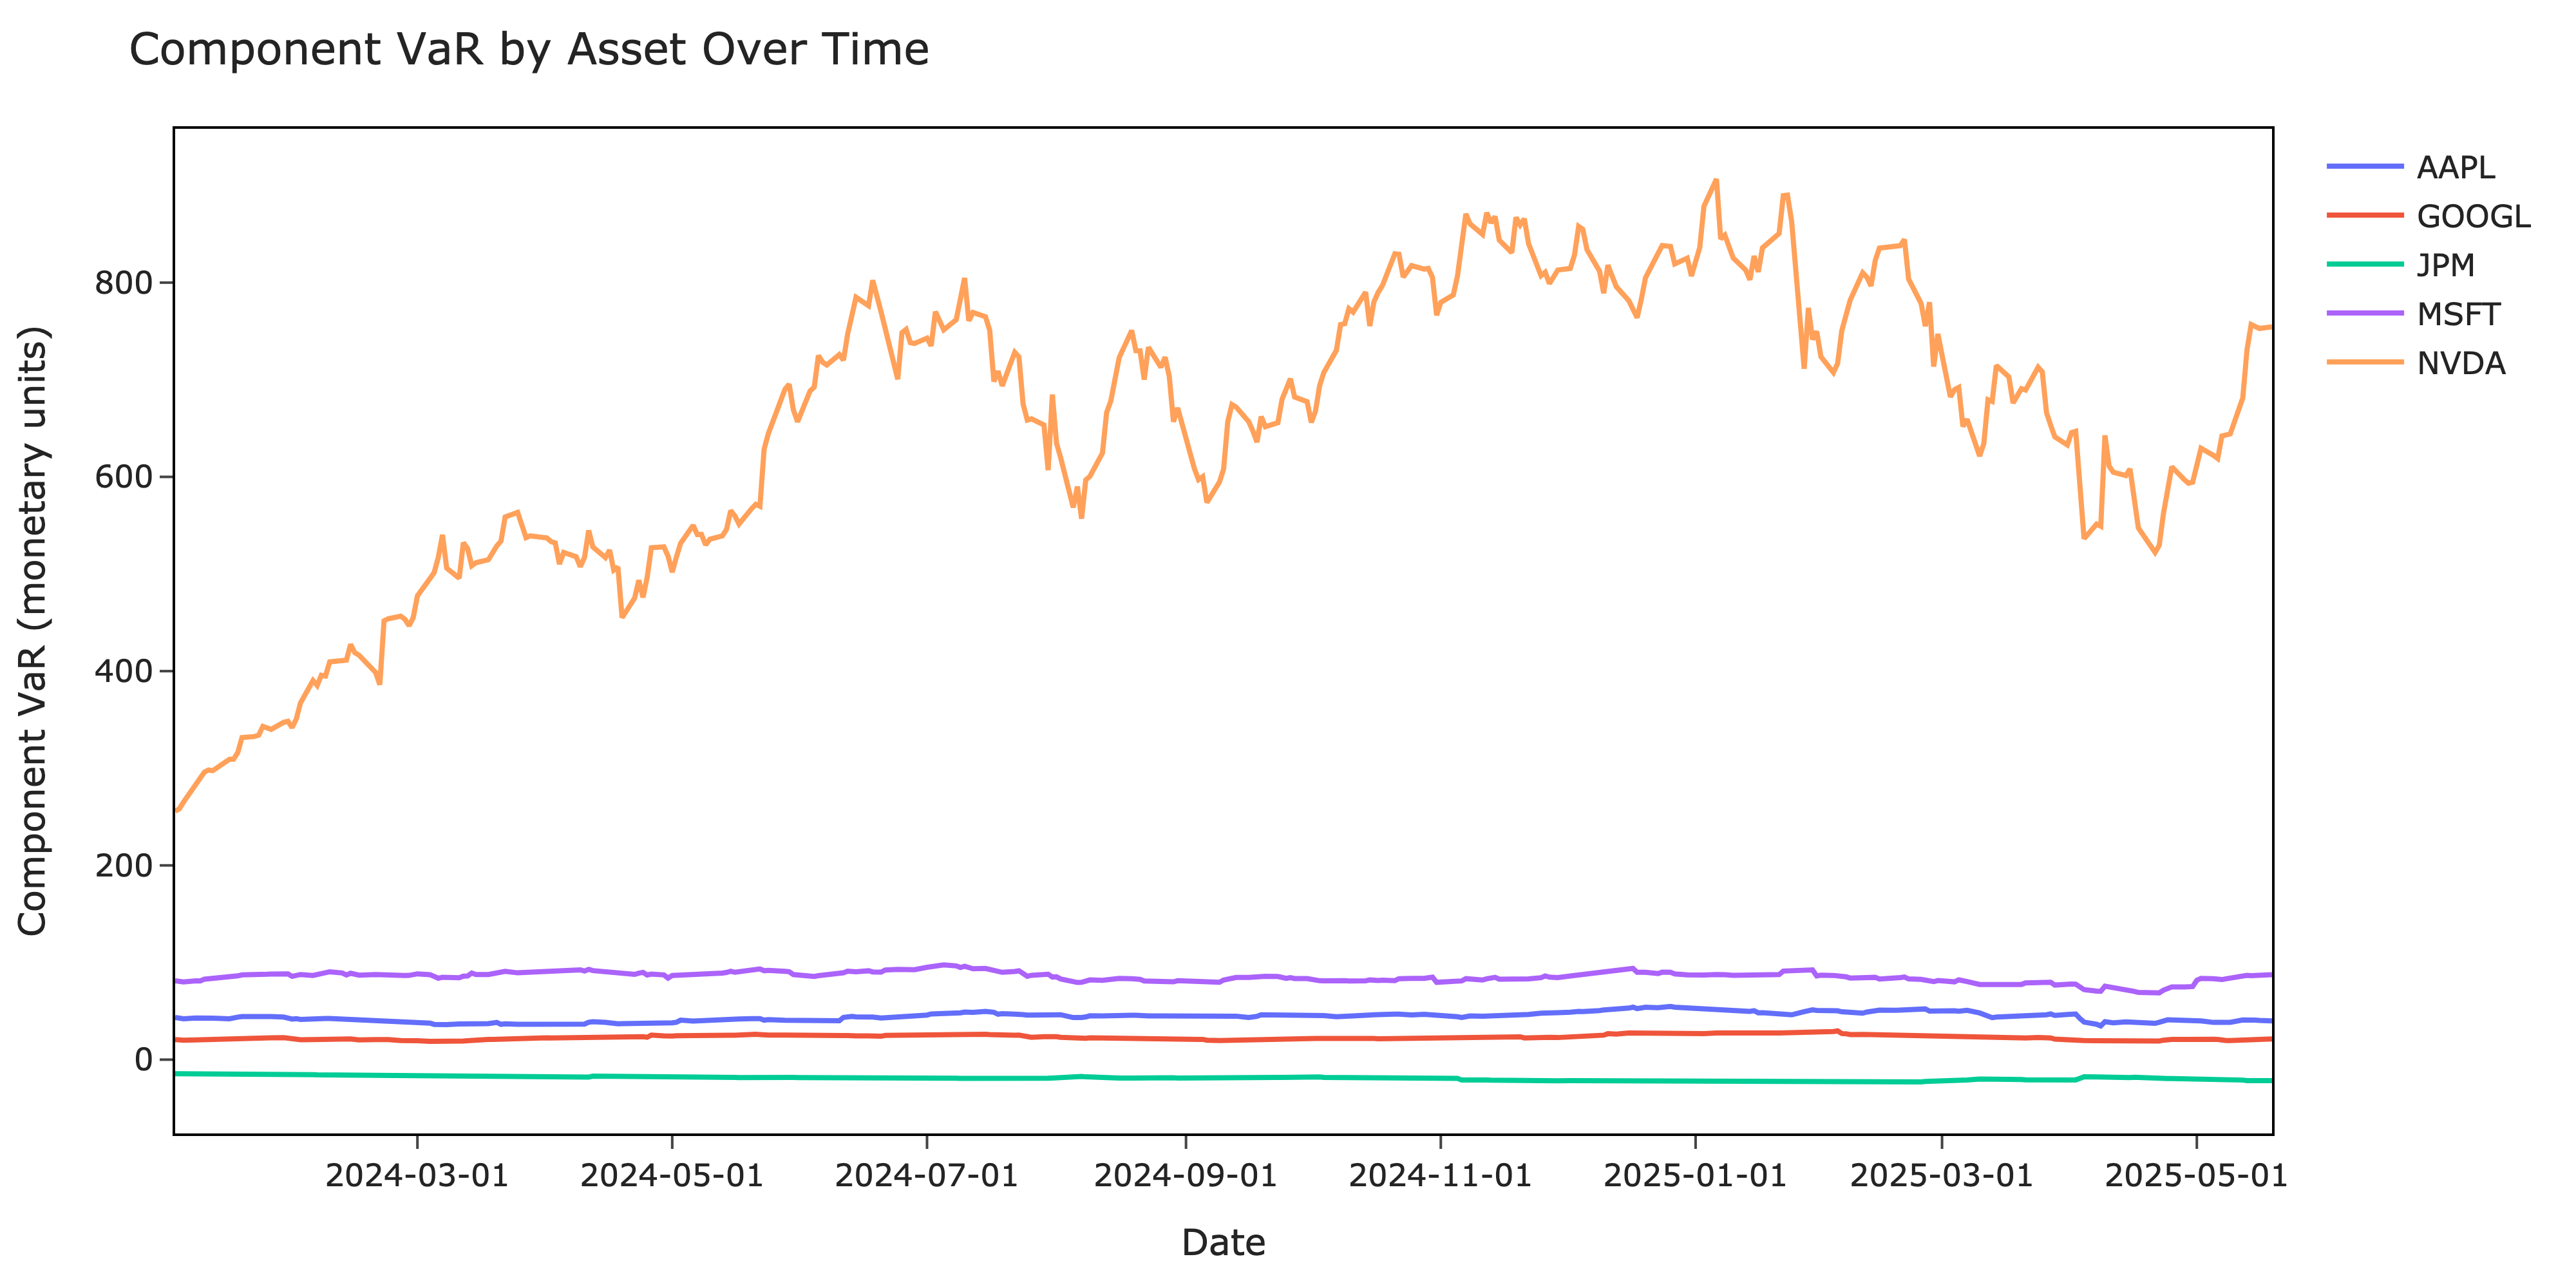

In [27]:
pl.plot_risk_contribution_lines(component_df, interactive=False)


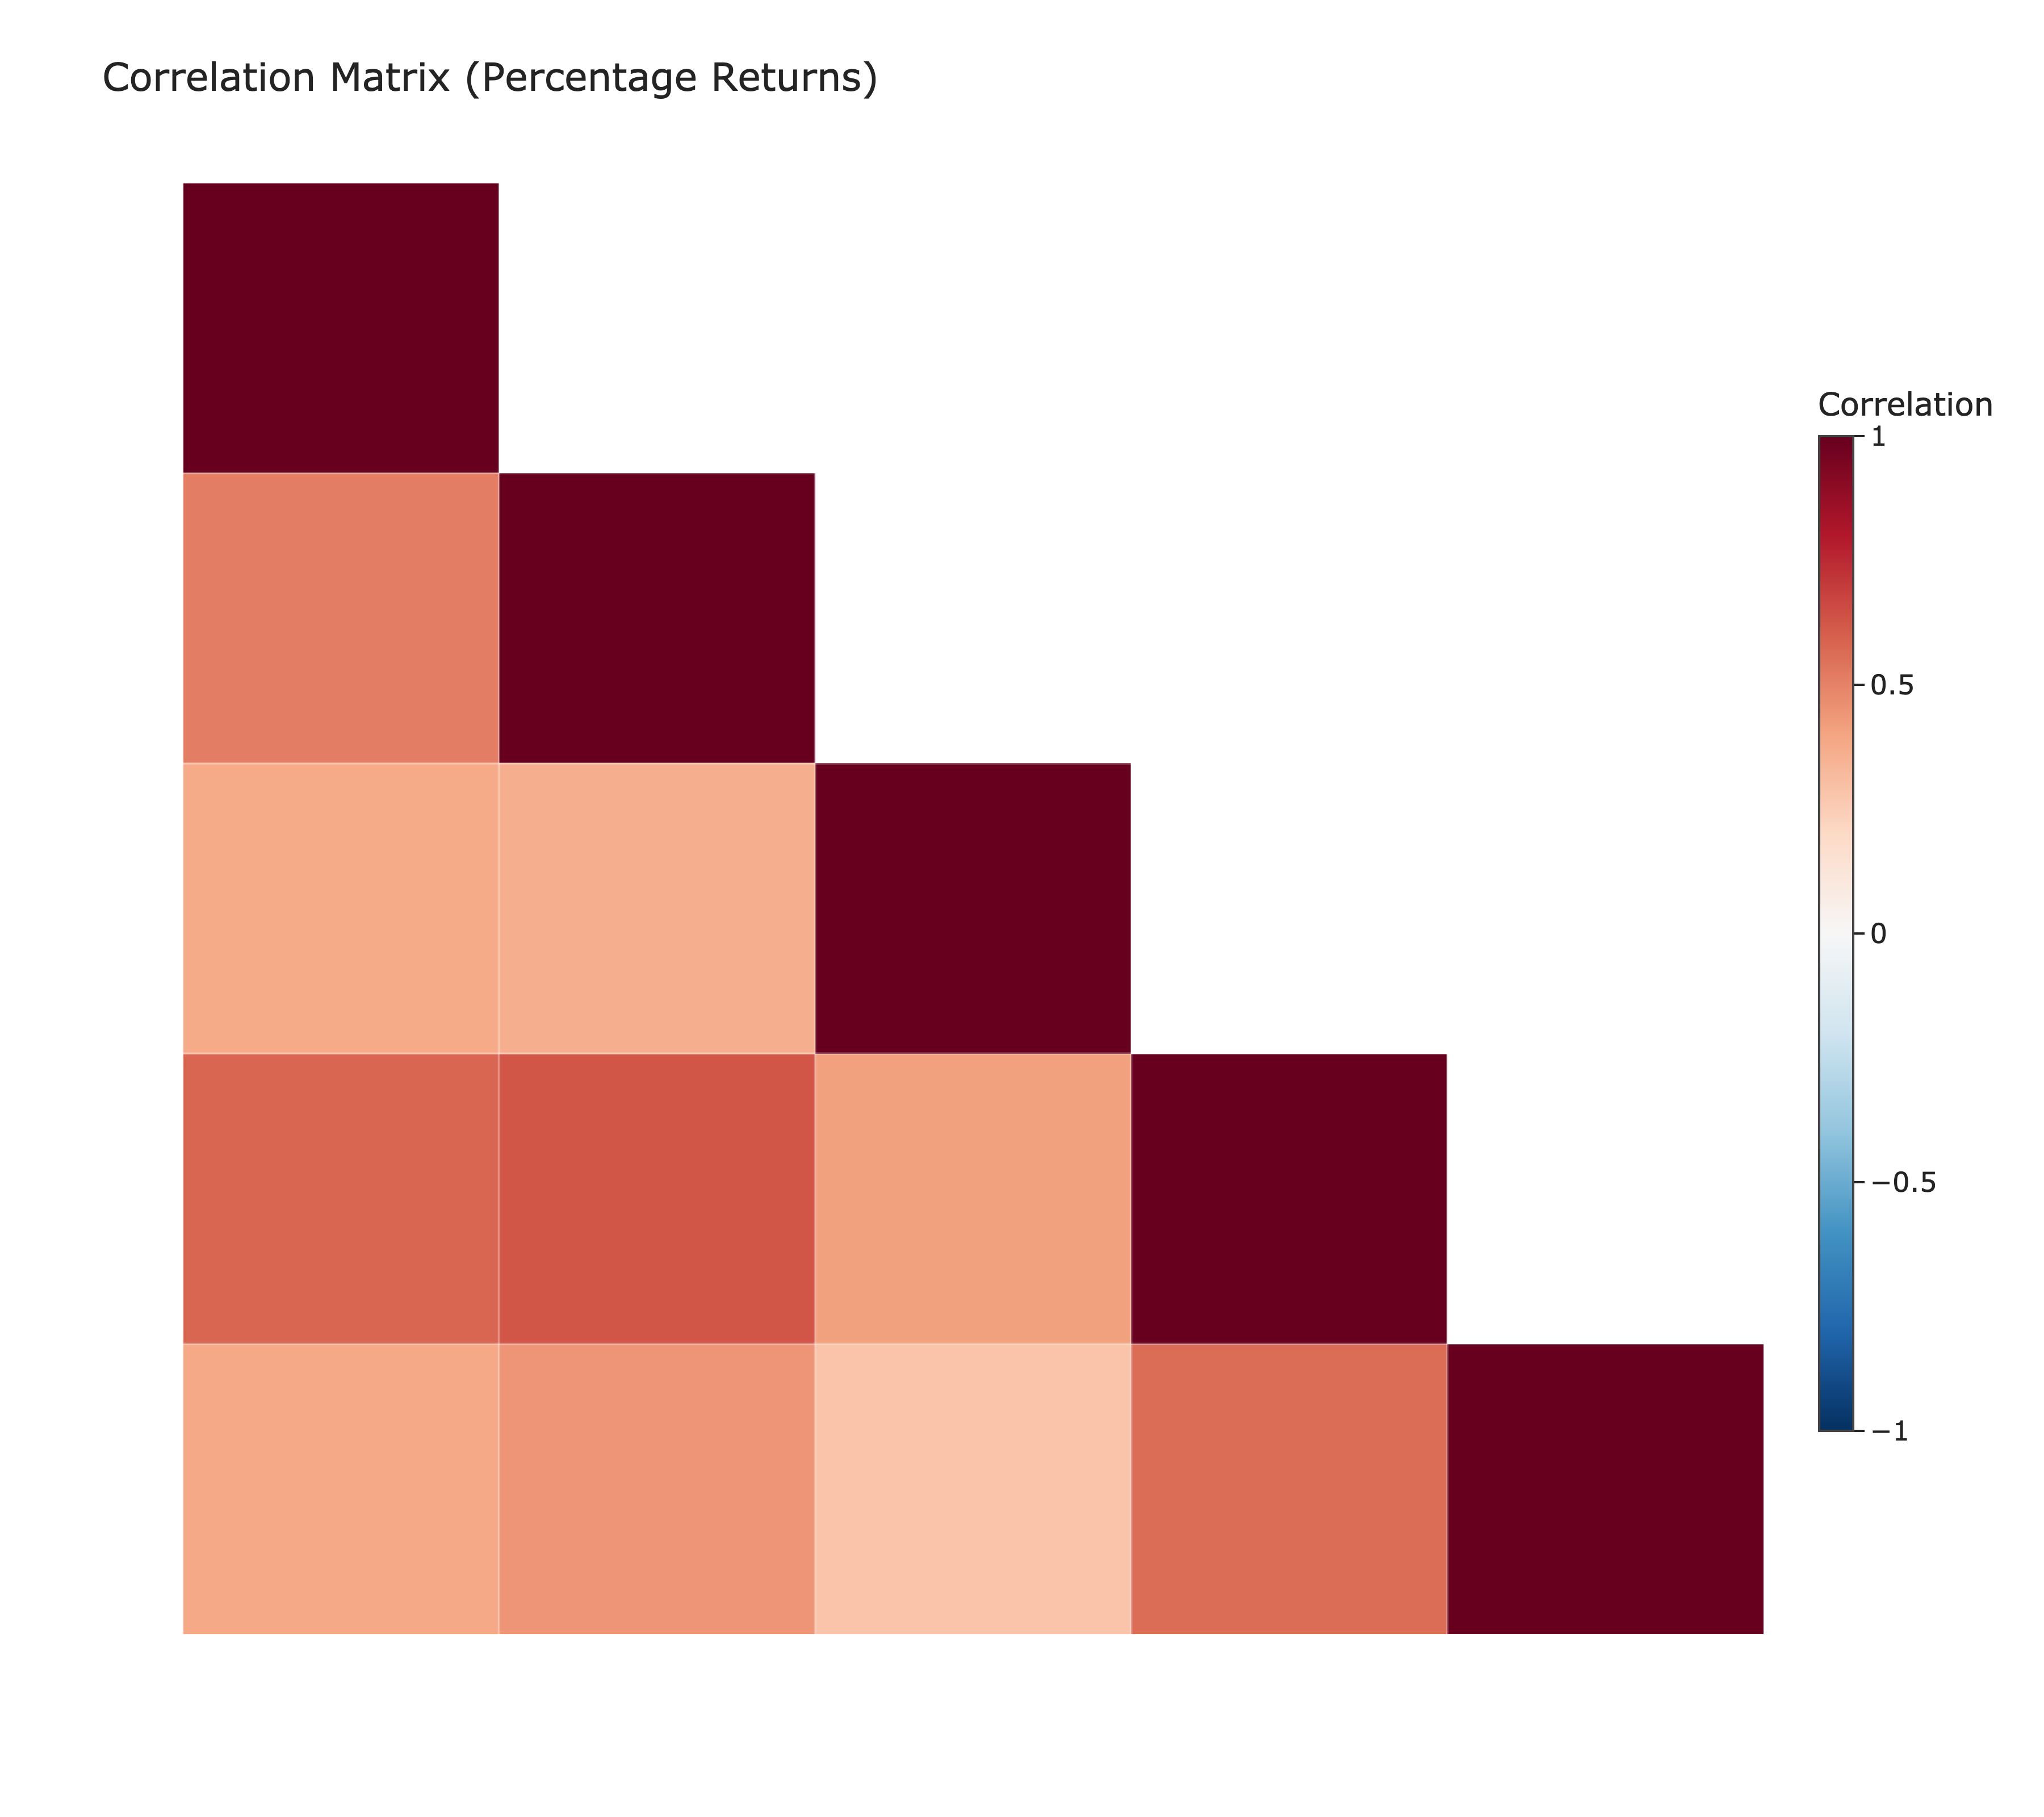

In [28]:
pl.plot_correlation_matrix(position_data, interactive=False)

---
### Appendix

- **Asset-Normal VaR (AN VaR)**  
  $$
  \text{VaR}_t = z_\alpha \cdot \sqrt{x_t^\top \Sigma x_t} \cdot \sqrt{h}
  $$

- **Undiversified VaR (UVaR)**  
  $$
  \text{UVaR}_t = z_\alpha \cdot \sum_{i=1}^N \sigma_i x_{i,t} \cdot \sqrt{h}
  $$

- **Marginal VaR**  
  $$
  \Delta \text{VaR}_{i,t} = \text{VaR}_t \cdot \frac{(\Sigma x_t)_i}{x_t^\top \Sigma x_t}
  $$

- **Component VaR**  
  $$
  \text{CVaR}_{i,t} = x_{i,t} \cdot \Delta \text{VaR}_{i,t}
  $$

- **Relative Component VaR**  
  $$
  \text{RCVaR}_{i,t} = \frac{\text{CVaR}_{i,t}}{\text{VaR}_t}
  $$

- **Incremental VaR**  
  $$
  \text{IVaR}_t = \Delta \text{VaR}_t^\top \cdot a
  $$

---

### Function Dependencies

```text
var_asset_normal()
 └── marginal_var()
      ├── component_var()
      │     └── relative_component_var()
      └── incremental_var()
```

---

### Notes
- All risk measures are in **monetary terms**.
- Covariance is based on returns inferred from time series of holdings.
- Inputs: matrix of monetary holdings, confidence level $z_\alpha$, and horizon $h$.